In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats
from tqdm import tqdm
import random

In [2]:
inputFile = "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
data = pd.read_csv(inputFile,sep='\t',low_memory=False)

In [3]:
data_processed = data[['Peptide'] + [c for c in data.columns if 'intensity_for_peptide_variant' in c]]

In [4]:
data_processed.replace(0.0,np.nan, inplace = True)

/tmp/ipykernel_91/24937952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_processed.replace(0.0,np.nan, inplace = True)


In [5]:
data_processed = data_processed.set_index("Peptide")

In [6]:
data_processed = data_processed.T

In [7]:
data_processed

Peptide,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V","I.[304.207]FTEVEMTTLE(K,304.207).V",K.[304.207]LYQPEYQEVSTEEQR.E,"K.[304.207]AANSLEAFIFETQD(K,304.207).L","R.[304.207]YSHDF(N,-56.985)FH.I","R.[304.207](P,143.096)SV(C,57.021)REAGPQAHMQQVTSSL(K,304.207).G",K.[304.207]QGSTGEEFHFQTGGR.D,"K.[304.207]HGTDDGVVW(M,15.995)NW(K,304.207).G","K.[304.207](H,100.027)GTDDGVVWMNW(K,304.207).G","K.[304.207]H(G,304.213)TDDGVVWMNW(K,304.207).G",...,"K.[304.207]YLGEE(Y,-21.617)V(K,304.207).A","K.[304.207]YLGEE(Y,-57.005)V(K,304.207).A","K.[304.207]YLGEE(Y,-58.064)V(K,304.207).A","K.[304.207]YLGEE(Y,-60.599)V(K,304.207).A","K.[304.207]YLGEE(Y,-63.608)V(K,304.207).A","K.[304.207]YLGE(E,-68.078)YV(K,304.207).A","K.[304.207]YL(G,55.921)EEYV(K,304.207).A","K.{187.018}[304.207]YLGEEYV(K,304.207).A","R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A","K.[304.207]YLGE(E,125.898)YV(K,304.207).A"
_dyn_#Empty.Empty.Empty..Empty.1_intensity_for_peptide_variant,2.459416,0.961707,0.326271,0.878024,0.170619,0.570221,0.574879,0.914939,0.649916,0.017884,...,0.521673,0.240862,0.787867,1.144694,0.929711,1.007395,0.353838,0.302468,0.735814,1.068300
_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for_peptide_variant,NaN,NaN,0.935916,NaN,NaN,NaN,NaN,NaN,NaN,0.288821,...,NaN,1.958825,NaN,NaN,1.174198,NaN,NaN,NaN,0.370040,NaN
_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_for_peptide_variant,6.645649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026024,...,NaN,2.544654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_for_peptide_variant,3.391896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009033,...,NaN,0.913199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_for_peptide_variant,1.919552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,...,NaN,1.035449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomatic-non-COVID-19..JBDZ6.1_intensity_for_peptide_variant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622780,0.613630,0.020799,...,NaN,0.189781,NaN,NaN,NaN,NaN,NaN,0.143696,NaN,0.118712
_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomatic-non-COVID-19..JBDZ7.1_intensity_for_peptide_variant,NaN,0.435434,0.200232,NaN,NaN,NaN,NaN,NaN,NaN,0.061746,...,NaN,0.247039,0.298399,NaN,NaN,0.670534,0.304344,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomatic-non-COVID-19..JBDZ8.1_intensity_for_peptide_variant,NaN,0.736280,0.170478,NaN,NaN,NaN,NaN,NaN,NaN,0.074855,...,NaN,0.246862,0.192796,NaN,NaN,1.330314,0.532133,NaN,NaN,NaN
_dyn_#Symptomatic-non-COVID-19.JBDZ9.Symptomatic-non-COVID-19..JBDZ9.1_intensity_for_peptide_variant,NaN,0.796550,0.197400,NaN,NaN,NaN,NaN,NaN,NaN,0.053722,...,NaN,0.296288,0.335600,NaN,NaN,1.204776,0.549213,NaN,NaN,NaN


In [8]:
data_processed.index = data_processed.index.map(lambda x:'.'.join(x.split('.')[:2]))

In [9]:
def create_label(x):
    if "#Healthy" in x:
        return 1
    elif "#Non-severe-COVID-19" in x:
        return 2
    elif "#Severe-COVID-19" in x:
        return 3
    elif "#Symptomatic-non-COVID-19" in x:
        return 4
    else:
        return 0
data_processed["label"]=data_processed.index.map(lambda x: create_label(x))

In [10]:
data_processed = data_processed[data_processed['label']!=0]

In [11]:
## Split Train and Test data after shuffling 
#data_processed.dropna(axis=1,inplace=True)
data_processed = data_processed.sample(frac=1, random_state=42)

data_processed.dropna(axis=1,inplace=True)

train = data_processed.iloc[:66,:]
test = data_processed.iloc[66:,:]

In [12]:
data_processed

Peptide,"R.[304.207]QQQHLFGSNVTD(C,57.021)SGNF(C,57.021)LFR.S","R.[304.207]QQQHLF(G,304.219)SNVTD(C,57.021)SGNF(C,57.021)LFR.S","K.[304.207]DLLFRDDTV(C,57.021)(L,134.957)A(K,304.207).L","R.[304.207]DDTV(C,58.003)LA(K,304.207).L","K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-18.085)FRDDTV(C,57.021)LA(K,304.207).L","L.[304.207](L,-19.069)FRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","R.[304.207]DDTV(C,73.017)LA(K,304.207).L",...,L.[304.207]FIYYASSLQSGVPSR.F,"K.[304.207]YLGEEYV(K,304.207).A","K.[304.207](Y,347.65)LGEEYV(K,304.207).A","K.[304.207]YLGEEY(V,128.488)(K,304.207).A","K.{52.915}[304.207]YLGEEYV(K,304.207).A","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YL(G,13.987)EEYV(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A",label
_dyn_#Non-severe-COVID-19.XG3,0.085017,0.852811,0.206083,0.114862,0.551174,0.392397,1.829180,0.667676,0.383060,0.868445,...,0.079721,0.699133,0.132804,0.231346,0.393102,0.599851,0.160796,0.277927,0.388465,2
_dyn_#Non-severe-COVID-19.Patient-group-PT,0.223794,0.468280,1.292670,0.846633,1.785873,0.395804,0.694310,0.610408,1.753949,1.335815,...,1.974454,1.943645,0.117838,0.839239,2.081710,1.513647,0.511558,0.933900,1.182999,2
_dyn_#Severe-COVID-19.XG36,0.061436,0.093823,0.053313,0.348643,0.075135,0.182105,0.055951,0.159644,0.011824,0.387000,...,0.053557,0.084413,0.033842,0.114396,0.215791,0.280818,0.105432,0.076816,0.065322,3
_dyn_#Symptomatic-non-COVID-19.JBDZ14,0.094259,0.185329,0.956349,0.302998,1.159294,0.591963,0.038915,0.263765,1.296192,0.737937,...,0.747284,0.948188,0.966776,0.391096,0.996684,0.799369,0.177114,0.478877,0.474480,4
_dyn_#Healthy.HC1,0.101284,1.352256,0.272530,0.161400,0.829766,0.694992,3.535461,0.724774,0.578344,0.808526,...,0.076964,1.036398,0.141851,0.340883,0.558244,0.923967,0.205740,0.402553,0.575944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Healthy.HC9,0.094497,0.254848,0.200908,0.111151,0.137870,0.158178,0.239026,0.228600,0.063915,0.041477,...,0.029928,0.373451,0.084071,0.059444,0.303213,0.390227,0.108136,0.134491,0.118989,1
_dyn_#Severe-COVID-19.XG42,0.044843,0.191617,0.917630,0.309265,0.353423,0.174655,0.127000,0.701526,0.548986,0.686248,...,0.220155,0.506223,0.067858,0.279197,0.497181,0.767148,0.438247,0.541052,0.723857,3
_dyn_#Symptomatic-non-COVID-19.JBDZ15,0.077130,0.237354,0.979818,0.168809,1.104969,0.561231,0.052402,0.227559,1.276553,0.377695,...,1.301254,0.761360,0.568085,0.318025,0.769956,0.604217,0.184606,0.370367,0.425314,4
_dyn_#Healthy.HC28,0.076341,0.301121,1.417788,0.365292,0.498423,0.261009,0.213849,0.932500,0.864131,0.807664,...,0.243651,0.739273,0.085299,0.418623,0.888054,1.199273,0.594104,0.804388,1.209548,1


In [13]:
# #Filter Data based on NaN for each label in training data
# per_label_count = train.groupby('label').count()
# filterCondition = (per_label_count >= 10).all()
# filter_per_label = per_label_count.loc[:, filterCondition]
# filter_column = list(filter_per_label.columns) +['label']
# filter_data =  train[filter_column]

In [14]:
# for column in tqdm(filter_data):
#     if column != "label":
#         filter_data[column] = filter_data.groupby("label")[column].transform(lambda x: x.fillna(x.mean()))

In [15]:
##filter_data.to_csv("filterd_data.tsv", sep="\t")
train.shape

(66, 10635)

In [16]:
#filter_data = train
# corr = train.corr()

In [17]:
#Correlation Matrix
# columns = np.full((corr.shape[0],), True, dtype=bool)
# for i in range(corr.shape[0]):
#     for j in range(i+1, corr.shape[0]):
#         if corr.iloc[i,j] >= 0.9:
#             if columns[j]:
#                 columns[j] = False
# selected_columns = train.columns[columns]
# train = train[selected_columns]

In [18]:
# print(len(selected_columns))
# print(train.shape)

In [19]:
##Ttest 
from itertools import combinations
from scipy import stats
from collections import defaultdict

grouped_df = train.groupby('label')
label_key = list(grouped_df.groups.keys())
peptide_key = list(grouped_df.get_group(label_key[0]).keys())


def ttest_run(c1, c2):
    results = stats.ttest_ind(c1, c2, equal_var=False, alternative='two-sided')
    if results.pvalue < 0.05:
        return 1
    return 0
    

imp = []
for p in tqdm(peptide_key):
    group_peptide = defaultdict(dict)
    for k in label_key: 
        group_peptide[k] = grouped_df.get_group(k)[p]
    
    ttest = [ttest_run(list(group_peptide[i]),list(group_peptide[j])) for i, j in combinations(label_key, 2)]
    if sum(ttest) > 0:
        imp.append(p)

    

100%|██████████| 10635/10635 [00:35<00:00, 303.04it/s]


In [20]:
len(imp)

1595

In [21]:
train = train[imp]

In [22]:
corr = train.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

print(len(selected_columns))
print(train.shape)

945
(66, 945)


In [23]:
test1 = test[train.columns]
# test1 = test1.fillna(0.0)

<AxesSubplot:xlabel='Peptide', ylabel='Peptide'>

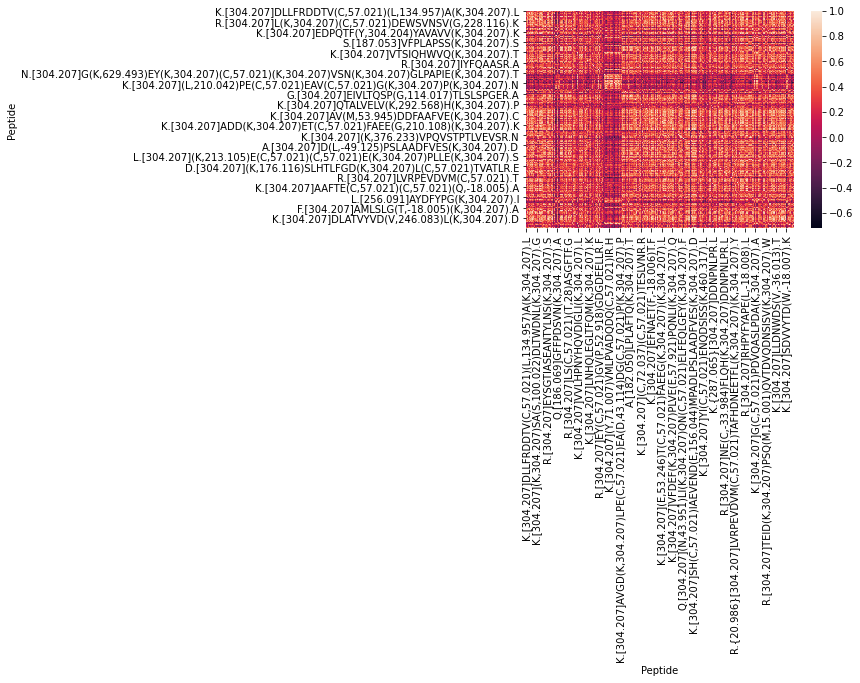

In [24]:
sns.heatmap(corr)

In [25]:
test1.shape

(24, 945)

In [26]:
## Logistic Regression 

X_train, Y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, Y_test = test1.iloc[:,:-1], test1.iloc[:,-1]

In [27]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k = 800)

# selector.fit(X_train, Y_train)

# selected_cols = selector.get_support(indices = True)

# X_train = X_train.iloc[:, selected_cols]

In [28]:
Y_train.shape

(66,)

In [29]:
# X_test = X_test[X_train.columns]


In [30]:
# X_test

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  classification_report

# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [32]:
# lr = LogisticRegression(random_state = 10)
# lr.fit(X_train,Y_train)

In [33]:
# lr_Y = lr.predict(X_test)
# lr_acc = accuracy_score(Y_test, lr_Y)
# print(lr_acc)
# print(classification_report(Y_test, lr_Y))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
svm_classifier = SVC(kernel="linear")


# classifier.fit(X_train, Y_train)
# y_pred = classifier.predict(X_test)
# rf_acc = accuracy_score(Y_test, y_pred)
# rf_acc

In [35]:
# Y_test 

In [36]:
# import matplotlib.pyplot as plt

# y = train[['-.[304.207](L,43.006)(K,304.207)(C,57.021)DEWSVNSVG(K,304.207).I', 'label']]
# val = y.groupby('label').mean()
# plt.scatter(list(val.index),list(val.values))
# plt.plot()

In [37]:
# val.values

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [39]:
lr1 = LogisticRegression(random_state = 20)

In [40]:
min_features_to_select = 800  # Minimum number of features to consider
rfecv_lr = RFECV(
    estimator=lr1,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)


In [41]:
rfecv_lr.fit(X_train, Y_train)
rfecv_lr_Y = rfecv_lr.predict(X_test)
rfecv_lr_acc = accuracy_score(Y_test, rfecv_lr_Y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [42]:
rfecv_lr_acc

0.875

In [43]:
print(classification_report(Y_test, rfecv_lr_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.80      1.00      0.89         4
           3       1.00      0.62      0.77         8
           4       0.78      1.00      0.88         7

    accuracy                           0.88        24
   macro avg       0.89      0.91      0.88        24
weighted avg       0.90      0.88      0.87        24



In [44]:
print(rfecv_lr.n_features_)

809


In [45]:
# from matplotlib import pyplot

# importance = rfecv_lr.estimator_.coef_[0]
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [46]:
X_train.loc[:, rfecv_lr.support_]

Peptide,"K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","V.[304.207](N,-37.08)DNEEGFFS.A","K.[304.207]NLNE(K,304.207)DYELL(C,57.021)LDGTR.K","L.[304.207](N,39.964)E(K,304.207)DYELL(C,57.021)LDGTR.K","N.[214.065]LNE(K,304.207)DYELL(C,57.021)LDGTR.K","K.{16.002}[304.207]NLNE(K,304.207)DYELL(C,57.021)LDGTR.K","K.{95.076}[304.207]NLNE(K,304.207)DYEL.L","R.[304.207](K,304.207)PVEEYAN(C,57.021)(H,57.026)LAR.A",...,"R.[304.207]IINEPTAAAIAYGLD(K,304.207)R.E","R.[304.207]FFESFGDL(S,304.224)TPDAVMGNP(K,304.207).V","R.[304.207](K,304.207)VTEEN(K,304.207)ELANELR.R",K.[304.207]ESASLMVDR.I,"K.[304.207]SLEDLQLTHN(K,304.207).I",R.[304.207]TLLEGEESR.M,"K.[304.207](C,57.021)S(T,304.214)SSLLEA(C,57.021)TFR.R","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A"
_dyn_#Non-severe-COVID-19.XG3,0.551174,0.392397,0.383060,0.747673,0.212741,0.324242,0.229816,0.261776,0.800306,0.499640,...,0.519771,0.172002,0.591369,0.378034,0.416126,0.657138,0.464703,0.599851,0.277927,0.388465
_dyn_#Non-severe-COVID-19.Patient-group-PT,1.785873,0.395804,1.753949,1.006224,2.216564,1.148784,0.258594,0.658582,0.977877,0.447316,...,1.278701,1.895313,0.478140,0.291746,0.319039,0.344999,0.496843,1.513647,0.933900,1.182999
_dyn_#Severe-COVID-19.XG36,0.075135,0.182105,0.011824,0.225180,0.078295,0.210269,0.087555,0.228640,0.419376,0.171575,...,0.044911,0.069193,0.039067,0.340926,0.123135,0.763682,0.091088,0.280818,0.076816,0.065322
_dyn_#Symptomatic-non-COVID-19.JBDZ14,1.159294,0.591963,1.296192,0.755652,1.046390,0.290547,0.444564,0.329461,0.500030,1.271098,...,0.649433,1.230099,0.117840,0.757593,0.793492,0.174758,0.332231,0.799369,0.478877,0.474480
_dyn_#Healthy.HC1,0.829766,0.694992,0.578344,1.073651,0.260779,0.397624,0.329594,0.341607,0.951255,0.285633,...,0.678679,0.533766,1.394006,0.130544,0.507879,0.941775,0.545356,0.923967,0.402553,0.575944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Severe-COVID-19.XG43,0.191656,0.096511,0.379771,0.721068,0.411419,0.213824,0.177339,0.289923,0.743046,0.156582,...,0.222718,0.214876,0.218724,0.496074,0.033386,4.255680,0.020933,0.683102,0.601404,0.217380
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.174026,0.187691,0.081800,0.455921,0.024520,0.525831,0.083735,0.548332,0.333517,0.246661,...,0.124220,0.127671,0.094223,0.267761,0.423803,2.606456,0.032364,0.515378,0.155510,0.164673
_dyn_#Healthy.HC3,0.686313,0.230169,0.522118,0.658724,0.262517,0.299392,0.121356,0.358395,0.975745,0.542447,...,0.553673,0.674883,1.719363,0.161628,0.398196,0.686474,0.640400,0.870161,0.315555,0.559507
_dyn_#Symptomatic-non-COVID-19.JBDZ16,0.432857,0.469259,0.728906,0.670716,0.560322,0.844558,0.464829,0.890132,0.767161,0.548744,...,3.093932,0.516706,0.087123,0.416927,0.569160,9.632314,0.369080,0.992733,0.733569,1.022918


In [47]:
arr = [i for i in rfecv_lr.ranking_ if i==1]
len(arr)

809

In [48]:
# print('Best features :', X_train.columns[rfecv_lr.support_])

X_new = X_train[X_train.columns[rfecv_lr.ranking_ == 1]]


In [49]:
X_new

Peptide,"K.[304.207]DLLF(R,-18.004)DDTV(C,57.021)LA(K,304.207).L","D.[215.050]LLFRDDTV(C,57.021)LA(K,304.207).L","K.[304.207]DLLFRDDTV(C,57.021)LA(K,304.207).L","V.[304.207](N,-37.08)DNEEGFFS.A","K.[304.207]NLNE(K,304.207)DYELL(C,57.021)LDGTR.K","L.[304.207](N,39.964)E(K,304.207)DYELL(C,57.021)LDGTR.K","N.[214.065]LNE(K,304.207)DYELL(C,57.021)LDGTR.K","K.{16.002}[304.207]NLNE(K,304.207)DYELL(C,57.021)LDGTR.K","K.{95.076}[304.207]NLNE(K,304.207)DYEL.L","R.[304.207](K,304.207)PVEEYAN(C,57.021)(H,57.026)LAR.A",...,"R.[304.207]IINEPTAAAIAYGLD(K,304.207)R.E","R.[304.207]FFESFGDL(S,304.224)TPDAVMGNP(K,304.207).V","R.[304.207](K,304.207)VTEEN(K,304.207)ELANELR.R",K.[304.207]ESASLMVDR.I,"K.[304.207]SLEDLQLTHN(K,304.207).I",R.[304.207]TLLEGEESR.M,"K.[304.207](C,57.021)S(T,304.214)SSLLEA(C,57.021)TFR.R","K.[304.207]YLGEE(Y,21.985)V(K,304.207).A","K.[304.207]YLGEEY(V,-18.002)(K,304.207).A","K.[304.207]YLGEE(Y,-20.114)V(K,304.207).A"
_dyn_#Non-severe-COVID-19.XG3,0.551174,0.392397,0.383060,0.747673,0.212741,0.324242,0.229816,0.261776,0.800306,0.499640,...,0.519771,0.172002,0.591369,0.378034,0.416126,0.657138,0.464703,0.599851,0.277927,0.388465
_dyn_#Non-severe-COVID-19.Patient-group-PT,1.785873,0.395804,1.753949,1.006224,2.216564,1.148784,0.258594,0.658582,0.977877,0.447316,...,1.278701,1.895313,0.478140,0.291746,0.319039,0.344999,0.496843,1.513647,0.933900,1.182999
_dyn_#Severe-COVID-19.XG36,0.075135,0.182105,0.011824,0.225180,0.078295,0.210269,0.087555,0.228640,0.419376,0.171575,...,0.044911,0.069193,0.039067,0.340926,0.123135,0.763682,0.091088,0.280818,0.076816,0.065322
_dyn_#Symptomatic-non-COVID-19.JBDZ14,1.159294,0.591963,1.296192,0.755652,1.046390,0.290547,0.444564,0.329461,0.500030,1.271098,...,0.649433,1.230099,0.117840,0.757593,0.793492,0.174758,0.332231,0.799369,0.478877,0.474480
_dyn_#Healthy.HC1,0.829766,0.694992,0.578344,1.073651,0.260779,0.397624,0.329594,0.341607,0.951255,0.285633,...,0.678679,0.533766,1.394006,0.130544,0.507879,0.941775,0.545356,0.923967,0.402553,0.575944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Severe-COVID-19.XG43,0.191656,0.096511,0.379771,0.721068,0.411419,0.213824,0.177339,0.289923,0.743046,0.156582,...,0.222718,0.214876,0.218724,0.496074,0.033386,4.255680,0.020933,0.683102,0.601404,0.217380
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.174026,0.187691,0.081800,0.455921,0.024520,0.525831,0.083735,0.548332,0.333517,0.246661,...,0.124220,0.127671,0.094223,0.267761,0.423803,2.606456,0.032364,0.515378,0.155510,0.164673
_dyn_#Healthy.HC3,0.686313,0.230169,0.522118,0.658724,0.262517,0.299392,0.121356,0.358395,0.975745,0.542447,...,0.553673,0.674883,1.719363,0.161628,0.398196,0.686474,0.640400,0.870161,0.315555,0.559507
_dyn_#Symptomatic-non-COVID-19.JBDZ16,0.432857,0.469259,0.728906,0.670716,0.560322,0.844558,0.464829,0.890132,0.767161,0.548744,...,3.093932,0.516706,0.087123,0.416927,0.569160,9.632314,0.369080,0.992733,0.733569,1.022918


In [68]:
from sklearn.feature_selection import SelectKBest, chi2

X_Kbest = SelectKBest(chi2, k=20).fit(X_new, Y_train)

In [69]:
# X_Kbest.pvalues_

In [70]:
cols = X_Kbest.get_support(indices=True)

In [71]:
features_df_new = X_new.iloc[:,cols]

In [72]:
features_df_new

Peptide,"K.[304.207]T(K,304.207)GTFAHR.D",R.[304.207]IQQIPNVR.R,"K.[304.207]FNWYVDGVEV(H,-57.062)NA(K,304.207).T","R.{291.173}[304.207]ILGGHLDA(K,304.207).G","K.[304.207](C,85.056)(C,57.021)TESLVNR.R","K.[304.207](C,57.021)(C,57.021)AAADPHE(C,57.021)YA(K,304.207)V(F,-57.9)DE.F","K.[304.207](C,57.021)(C,57.021)AAADPHE(C,213.128)YA(K,304.207).V","K.[304.207]YI(C,57.021)ENQD(S,347.201)ISS(K,304.207).L","K.[304.207](A,42.052)EFAEVS(K,304.207).L","K.[229.166]AEFAEVS(K,304.207).L","K.[304.207]QEPERNE(C,57.021)FLQH(K,231.236)D.D","K.[304.207](S,144.078)LHTLFGD(K,304.207).L","R.[304.207](F,-13.032)(K,304.207)DLGEENF(K,304.207).A","F.[304.207](K,296.162)DLGEENF(K,304.207).A","F.[304.207](K,291.14)DLGEENF(K,304.207).A","K.{311.259}[304.207]AAFTE(C,57.021)(C,57.021)QAAD(K,304.207).A","K.{152.824}[304.207]AAFTE(C,57.021)(C,57.021)QA.-","K.[304.207](Y,149.157)TYETTLE(K,304.207).C","K.[304.207]LVD(K,304.207)FLED(V,276.182)(K,304.207).K","P.{67.076}[304.207]WDRV(K,304.207)DLATVYVDVL(K,304.207)DSGR.D"
_dyn_#Non-severe-COVID-19.XG3,0.177651,48.192062,0.563721,6.962053,0.265009,1.095478,1.794262,0.011738,0.333959,1.186750,1.139566,0.089753,1.954133,7.486197,0.062969,30.183231,6.218844,0.011274,15.503521,0.837696
_dyn_#Non-severe-COVID-19.Patient-group-PT,1.522917,7.684637,0.653806,1.684259,1.192519,0.337117,2.152848,0.231024,0.268270,0.244201,1.086983,0.824243,1.211855,0.054423,2.588474,2.267848,1.587377,0.069798,0.240845,2.460118
_dyn_#Severe-COVID-19.XG36,0.124456,3.740291,0.226079,0.983859,0.695665,0.190270,0.028402,0.180244,0.087268,0.138808,0.398186,0.043955,0.146140,1.504473,0.052428,0.210166,0.093088,0.037965,2.110414,0.176829
_dyn_#Symptomatic-non-COVID-19.JBDZ14,0.696679,3.127456,0.862713,0.150420,9.819187,0.544175,0.309072,1.059279,0.478497,1.486407,0.323317,0.389810,0.213352,4.633151,1.223381,0.553995,0.380438,0.026239,11.492827,0.338753
_dyn_#Healthy.HC1,0.274691,2.253929,0.621410,2.287542,4.094602,0.518084,1.045024,0.148067,1.973184,0.634103,8.974509,1.338987,1.722849,0.145078,6.401223,0.817374,4.306642,0.034538,0.989142,1.956485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_dyn_#Severe-COVID-19.XG43,0.365497,19.555899,2.102413,0.691098,0.850458,0.303414,0.808760,1.406778,0.658271,0.400692,0.125792,0.447112,0.668698,2.179294,0.375138,0.251181,0.287563,0.188182,43.210142,0.288314
_dyn_#Symptomatic-non-COVID-19.JBDZ9,0.135199,2.189945,0.143384,0.451357,7.171440,0.238910,0.276341,0.215381,0.131257,0.165576,0.228312,0.130783,0.094460,0.201259,1.993700,0.795462,0.105024,0.007395,0.809348,0.373851
_dyn_#Healthy.HC3,1.271496,0.827756,0.652145,1.167485,2.961851,0.650390,0.948296,0.229656,0.237639,0.752925,0.729639,1.193577,0.438556,0.064097,4.880449,0.595289,1.378811,0.016467,0.354610,0.734603
_dyn_#Symptomatic-non-COVID-19.JBDZ16,0.388241,4.410836,0.423107,0.655470,1.210202,0.451460,1.157941,0.126127,0.442910,1.445852,0.247198,0.444931,0.555437,14.993997,6.836760,0.517263,0.557023,0.575363,13.218777,0.249829


In [73]:
def z_score(df):
    df_std = df.copy()
    for col in df_std.columns:
        df_std[col] = (df_std[col] - df_std[col].mean()) / df_std[col].std()
        df_std[col] = df_std[col].map(lambda x: x if np.isnan(x) else min(3, max(-3, x)))
    
    return df_std


peptides_heatmap = data_processed.copy()
# for column in peptides_heatmap.columns:
#     peptides_heatmap[column] = peptides_heatmap[column]  / peptides_heatmap[column].abs().max()
      
top_peptides = features_df_new.columns.values.tolist()
print(top_peptides)
peptides_heatmap = peptides_heatmap.loc[:, list(top_peptides)]
peptides_heatmap = z_score(peptides_heatmap)
peptides_heatmap = peptides_heatmap.T
peptides_heatmap

['K.[304.207]T(K,304.207)GTFAHR.D', 'R.[304.207]IQQIPNVR.R', 'K.[304.207]FNWYVDGVEV(H,-57.062)NA(K,304.207).T', 'R.{291.173}[304.207]ILGGHLDA(K,304.207).G', 'K.[304.207](C,85.056)(C,57.021)TESLVNR.R', 'K.[304.207](C,57.021)(C,57.021)AAADPHE(C,57.021)YA(K,304.207)V(F,-57.9)DE.F', 'K.[304.207](C,57.021)(C,57.021)AAADPHE(C,213.128)YA(K,304.207).V', 'K.[304.207]YI(C,57.021)ENQD(S,347.201)ISS(K,304.207).L', 'K.[304.207](A,42.052)EFAEVS(K,304.207).L', 'K.[229.166]AEFAEVS(K,304.207).L', 'K.[304.207]QEPERNE(C,57.021)FLQH(K,231.236)D.D', 'K.[304.207](S,144.078)LHTLFGD(K,304.207).L', 'R.[304.207](F,-13.032)(K,304.207)DLGEENF(K,304.207).A', 'F.[304.207](K,296.162)DLGEENF(K,304.207).A', 'F.[304.207](K,291.14)DLGEENF(K,304.207).A', 'K.{311.259}[304.207]AAFTE(C,57.021)(C,57.021)QAAD(K,304.207).A', 'K.{152.824}[304.207]AAFTE(C,57.021)(C,57.021)QA.-', 'K.[304.207](Y,149.157)TYETTLE(K,304.207).C', 'K.[304.207]LVD(K,304.207)FLED(V,276.182)(K,304.207).K', 'P.{67.076}[304.207]WDRV(K,304.207)DLATVYVDVL(K,3

,_dyn_#Non-severe-COVID-19.XG3,_dyn_#Non-severe-COVID-19.Patient-group-PT,_dyn_#Severe-COVID-19.XG36,_dyn_#Symptomatic-non-COVID-19.JBDZ14,_dyn_#Healthy.HC1,_dyn_#Non-severe-COVID-19.XG13,_dyn_#Non-severe-COVID-19.XG25,_dyn_#Symptomatic-non-COVID-19.JBDZ1,_dyn_#Healthy.HC24,_dyn_#Non-severe-COVID-19.XG7,...,_dyn_#Healthy.HC12,_dyn_#Non-severe-COVID-19.XG1,_dyn_#Symptomatic-non-COVID-19.JBDZ4,_dyn_#Symptomatic-non-COVID-19.JBDZ18,_dyn_#Symptomatic-non-COVID-19.JBDZ3,_dyn_#Healthy.HC9,_dyn_#Severe-COVID-19.XG42,_dyn_#Symptomatic-non-COVID-19.JBDZ15,_dyn_#Healthy.HC28,_dyn_#Severe-COVID-19.XG31
Peptide,,,,,,,,,,,,,,,,,,,,,
"K.[304.207]T(K,304.207)GTFAHR.D",-0.547887,1.310688,-0.621379,0.169186,-0.413820,-0.559106,-0.433613,-0.444292,1.948446,-0.718619,...,0.726465,-0.534279,-0.476877,-0.094731,-0.352269,-0.301077,-0.351723,0.151143,2.349281,-0.459754
R.[304.207]IQQIPNVR.R,3.000000,-0.078364,-0.437688,-0.493517,-0.573094,-0.457177,0.809370,0.888161,-0.481526,-0.650115,...,-0.404854,3.000000,-0.593454,-0.507856,-0.064797,-0.617943,0.299242,1.012444,-0.709936,-0.604251
"K.[304.207]FNWYVDGVEV(H,-57.062)NA(K,304.207).T",-0.261681,-0.213089,-0.443802,-0.100407,-0.230564,-0.430076,-0.217103,-0.137326,-0.118015,-0.518981,...,-0.402806,-0.299493,-0.543158,-0.332656,-0.227495,-0.418971,-0.102026,-0.074207,-0.066448,-0.533548
"R.{291.173}[304.207]ILGGHLDA(K,304.207).G",3.000000,0.258972,-0.243581,-0.841590,0.691840,0.713758,1.343435,-0.350341,-0.663562,-0.067915,...,-0.752541,0.721637,-0.792129,-0.723638,-0.749141,-0.754344,2.068777,-0.414972,-0.596018,-0.446188
"K.[304.207](C,85.056)(C,57.021)TESLVNR.R",-0.541785,-0.388025,-0.470392,1.042073,0.093072,-0.498700,-0.444024,-0.452206,3.000000,-0.432616,...,-0.404439,-0.461652,-0.467449,2.457302,0.258576,-0.176539,-0.468427,1.304552,0.768204,-0.340529
"K.[304.207](C,57.021)(C,57.021)AAADPHE(C,57.021)YA(K,304.207)V(F,-57.9)DE.F",0.242960,-0.487492,-0.628935,-0.288054,-0.313185,-0.390590,0.349733,-0.110814,0.269871,-0.586114,...,-0.148041,0.862758,-0.538284,1.093122,-0.387056,-0.326073,-0.212370,-0.083333,2.549962,-0.699183
"K.[304.207](C,57.021)(C,57.021)AAADPHE(C,213.128)YA(K,304.207).V",0.394480,0.621815,-0.725034,-0.547096,-0.080520,-0.686962,-0.118433,0.140730,0.363790,-0.612816,...,-0.641330,0.462431,-0.383486,1.987050,-0.325278,-0.490891,0.148143,-0.470368,3.000000,-0.576340
"K.[304.207]YI(C,57.021)ENQD(S,347.201)ISS(K,304.207).L",-0.578232,-0.380865,-0.426569,0.364599,-0.455530,-0.499384,-0.252165,-0.476286,-0.114153,-0.486303,...,-0.490026,-0.508193,-0.468631,-0.481630,-0.495465,-0.397013,-0.405922,0.299760,-0.230480,-0.451792
"K.[304.207](A,42.052)EFAEVS(K,304.207).L",-0.278363,-0.330566,-0.474404,-0.163502,1.024297,-0.411547,0.327874,-0.345662,3.000000,-0.451340,...,-0.455949,-0.402336,-0.423138,-0.419100,-0.404563,-0.362423,-0.242198,-0.315690,-0.217397,-0.435533


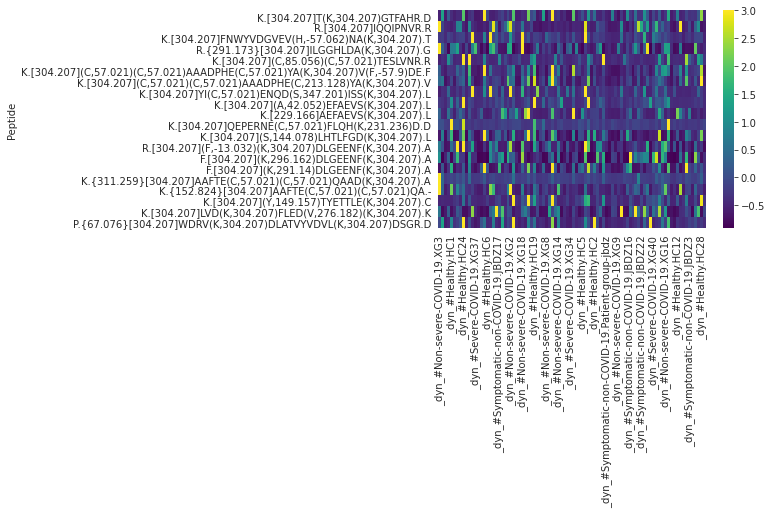

In [74]:
cmap = sns.color_palette('viridis', as_cmap = True)

with sns.axes_style('white'):
    sns.heatmap(peptides_heatmap, cmap = cmap)

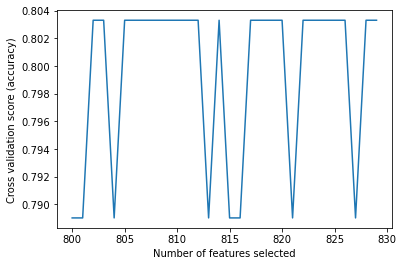

In [57]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_lr.grid_scores_) + min_features_to_select),
    rfecv_lr.grid_scores_,
)
plt.show()

In [58]:
rfecv_rfc = RFECV(
    estimator=rf_classifier,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfecv_rfc.fit(X_train, Y_train)
rfecv_rfc_Y = rfecv_rfc.predict(X_test)
rfecv_rfc_acc = accuracy_score(Y_test, rfecv_rfc_Y)


In [59]:
rfecv_rfc_acc

0.4166666666666667

In [60]:
print(classification_report(Y_test, rfecv_rfc_Y))

              precision    recall  f1-score   support

           1       0.38      0.60      0.46         5
           2       0.36      1.00      0.53         4
           3       1.00      0.25      0.40         8
           4       0.33      0.14      0.20         7

    accuracy                           0.42        24
   macro avg       0.52      0.50      0.40        24
weighted avg       0.57      0.42      0.38        24



In [61]:
print(rfecv_rfc.n_features_)

934


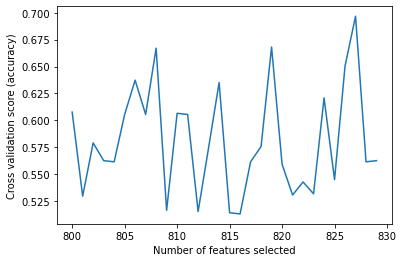

In [62]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_rfc.grid_scores_) + min_features_to_select),
    rfecv_rfc.grid_scores_,
)
plt.show()

In [63]:
rfecv_svc = RFECV(
    estimator=svm_classifier,
    step=5,
    cv=5,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

rfecv_svc.fit(X_train, Y_train)
rfecv_svc_Y = rfecv_svc.predict(X_test)
rfecv_svc_acc = accuracy_score(Y_test, rfecv_svc_Y)

In [64]:
rfecv_svc_acc

0.8333333333333334

In [65]:
print(classification_report(Y_test, rfecv_svc_Y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       0.50      0.75      0.60         4
           3       1.00      0.62      0.77         8
           4       0.88      1.00      0.93         7

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.88      0.83      0.84        24



In [66]:
print(rfecv_svc.n_features_)

800


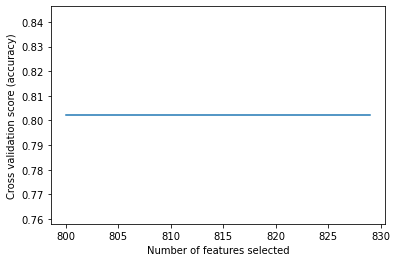

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv_svc.grid_scores_) + min_features_to_select),
    rfecv_svc.grid_scores_,
)
plt.show()